<a href="https://colab.research.google.com/github/rocx320/MachineLearning/blob/main/Hepatitis_C_Predictions_CAC2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Libraries and Dataset

In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import cross_val_score
from matplotlib import style
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

style.use("fivethirtyeight")
warnings.simplefilter("ignore")

In [94]:
df = pd.read_csv('/content/drive/MyDrive/data/data.csv')
df.head()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [6]:
# Dropping Unnamed Column as it serves no purpose
df.drop("Unnamed: 0", axis=1, inplace=True)
df.dtypes

Category     object
Age           int64
Sex          object
ALB         float64
ALP         float64
ALT         float64
AST         float64
BIL         float64
CHE         float64
CHOL        float64
CREA        float64
GGT         float64
PROT        float64
dtype: object

In [8]:
print(df.Category.unique())

['0=Blood Donor' '0s=suspect Blood Donor' '1=Hepatitis' '2=Fibrosis'
 '3=Cirrhosis']


# Mapping Numeric Values

In [9]:
# Mapping numeric values

df['Category'] = df['Category'].map({'0=Blood Donor': 0, '0s=suspect Blood Donor': 0,
                                     "1=Hepatitis" : 1, "2=Fibrosis" : 1, "3=Cirrhosis" : 1})

df['Sex'] = df['Sex'].map({'m': 1, 'f': 2})

In [10]:
df.head()

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0,32,1,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0,32,1,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0,32,1,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0,32,1,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0,32,1,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [11]:
# Checking the data types again after the transformation
df.dtypes

Category      int64
Age           int64
Sex           int64
ALB         float64
ALP         float64
ALT         float64
AST         float64
BIL         float64
CHE         float64
CHOL        float64
CREA        float64
GGT         float64
PROT        float64
dtype: object

In [12]:
# Checking for missing values in the dataset
df.isna().sum()

Category     0
Age          0
Sex          0
ALB          1
ALP         18
ALT          1
AST          0
BIL          0
CHE          0
CHOL        10
CREA         0
GGT          0
PROT         1
dtype: int64

In [13]:
# Filling missing values with the median
df.fillna(df.median(), inplace=True)

In [14]:
df.isna().sum()

Category    0
Age         0
Sex         0
ALB         0
ALP         0
ALT         0
AST         0
BIL         0
CHE         0
CHOL        0
CREA        0
GGT         0
PROT        0
dtype: int64

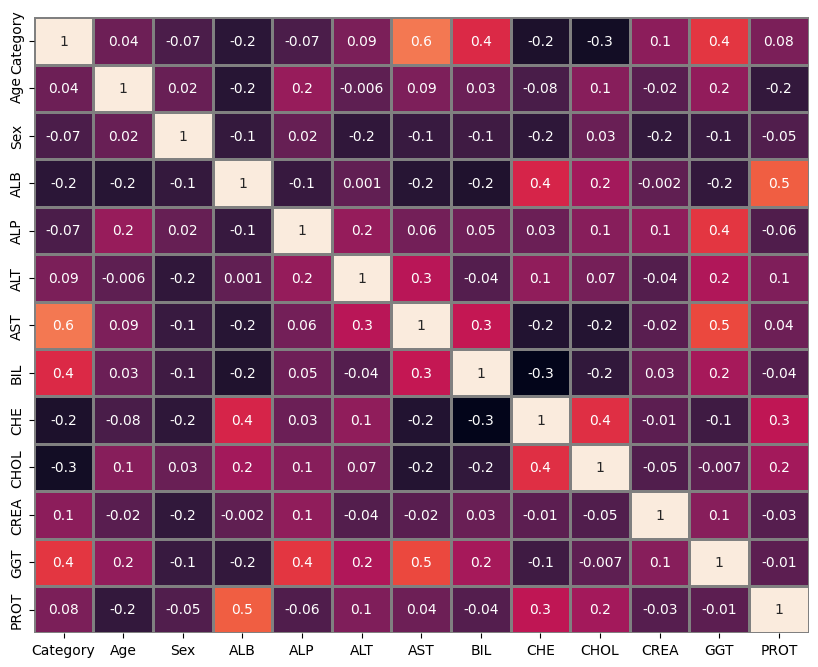

In [19]:
# Having a look at the correlation matrix

fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, fmt='.1g', cbar=False, linewidths=1, linecolor='grey');

In [20]:
print ('Total Suspected Patients : {} '.format(df.Category.value_counts()[0]))
print ('Total Healthy Patients : {} '.format(df.Category.value_counts()[1]))

Total Suspected Patients : 540 
Total Healthy Patients : 75 


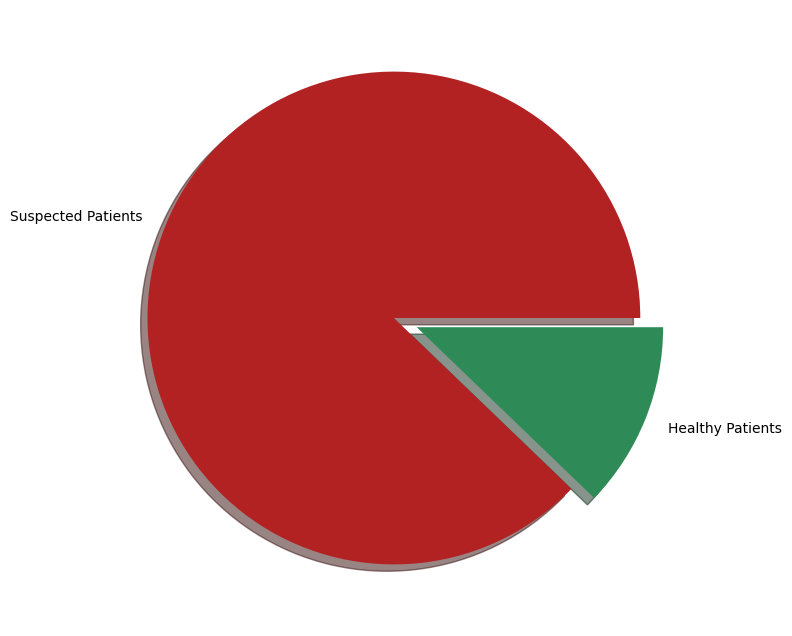

In [21]:
fig, ax = plt.subplots(figsize=(8,8))

plt.pie(x=df["Category"].value_counts(),
        colors=["firebrick","seagreen"],
        labels=["Suspected Patients","Healthy Patients"],
        shadow = True,
        explode = (0, 0.1)
        )

plt.show()

In [23]:
df.Sex.value_counts()

# 1 - Male
# 2 - Female

1    377
2    238
Name: Sex, dtype: int64

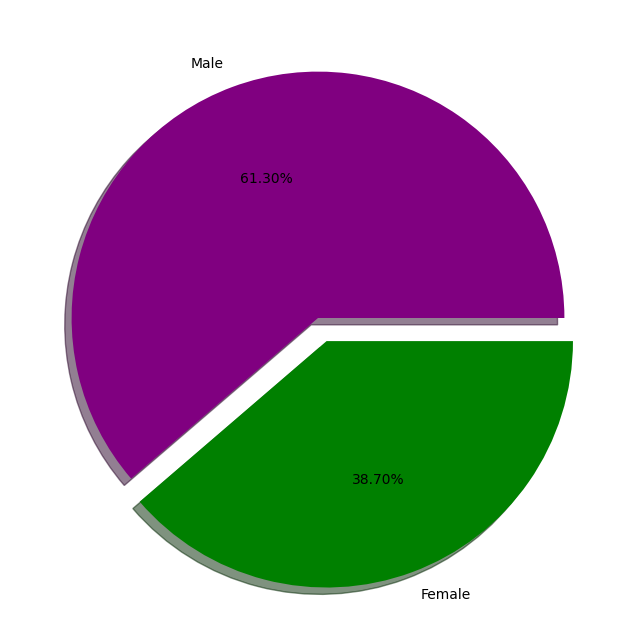

In [28]:
fig, ax = plt.subplots(figsize=(8,8))
plt.pie(x=df["Sex"].value_counts(),
        colors=["purple","green"],
        labels=["Male","Female"],
        shadow = True,
        autopct="%1.2f%%",
        explode = (0, 0.1)
        )
plt.show()

# Visualising the Numerical Columns

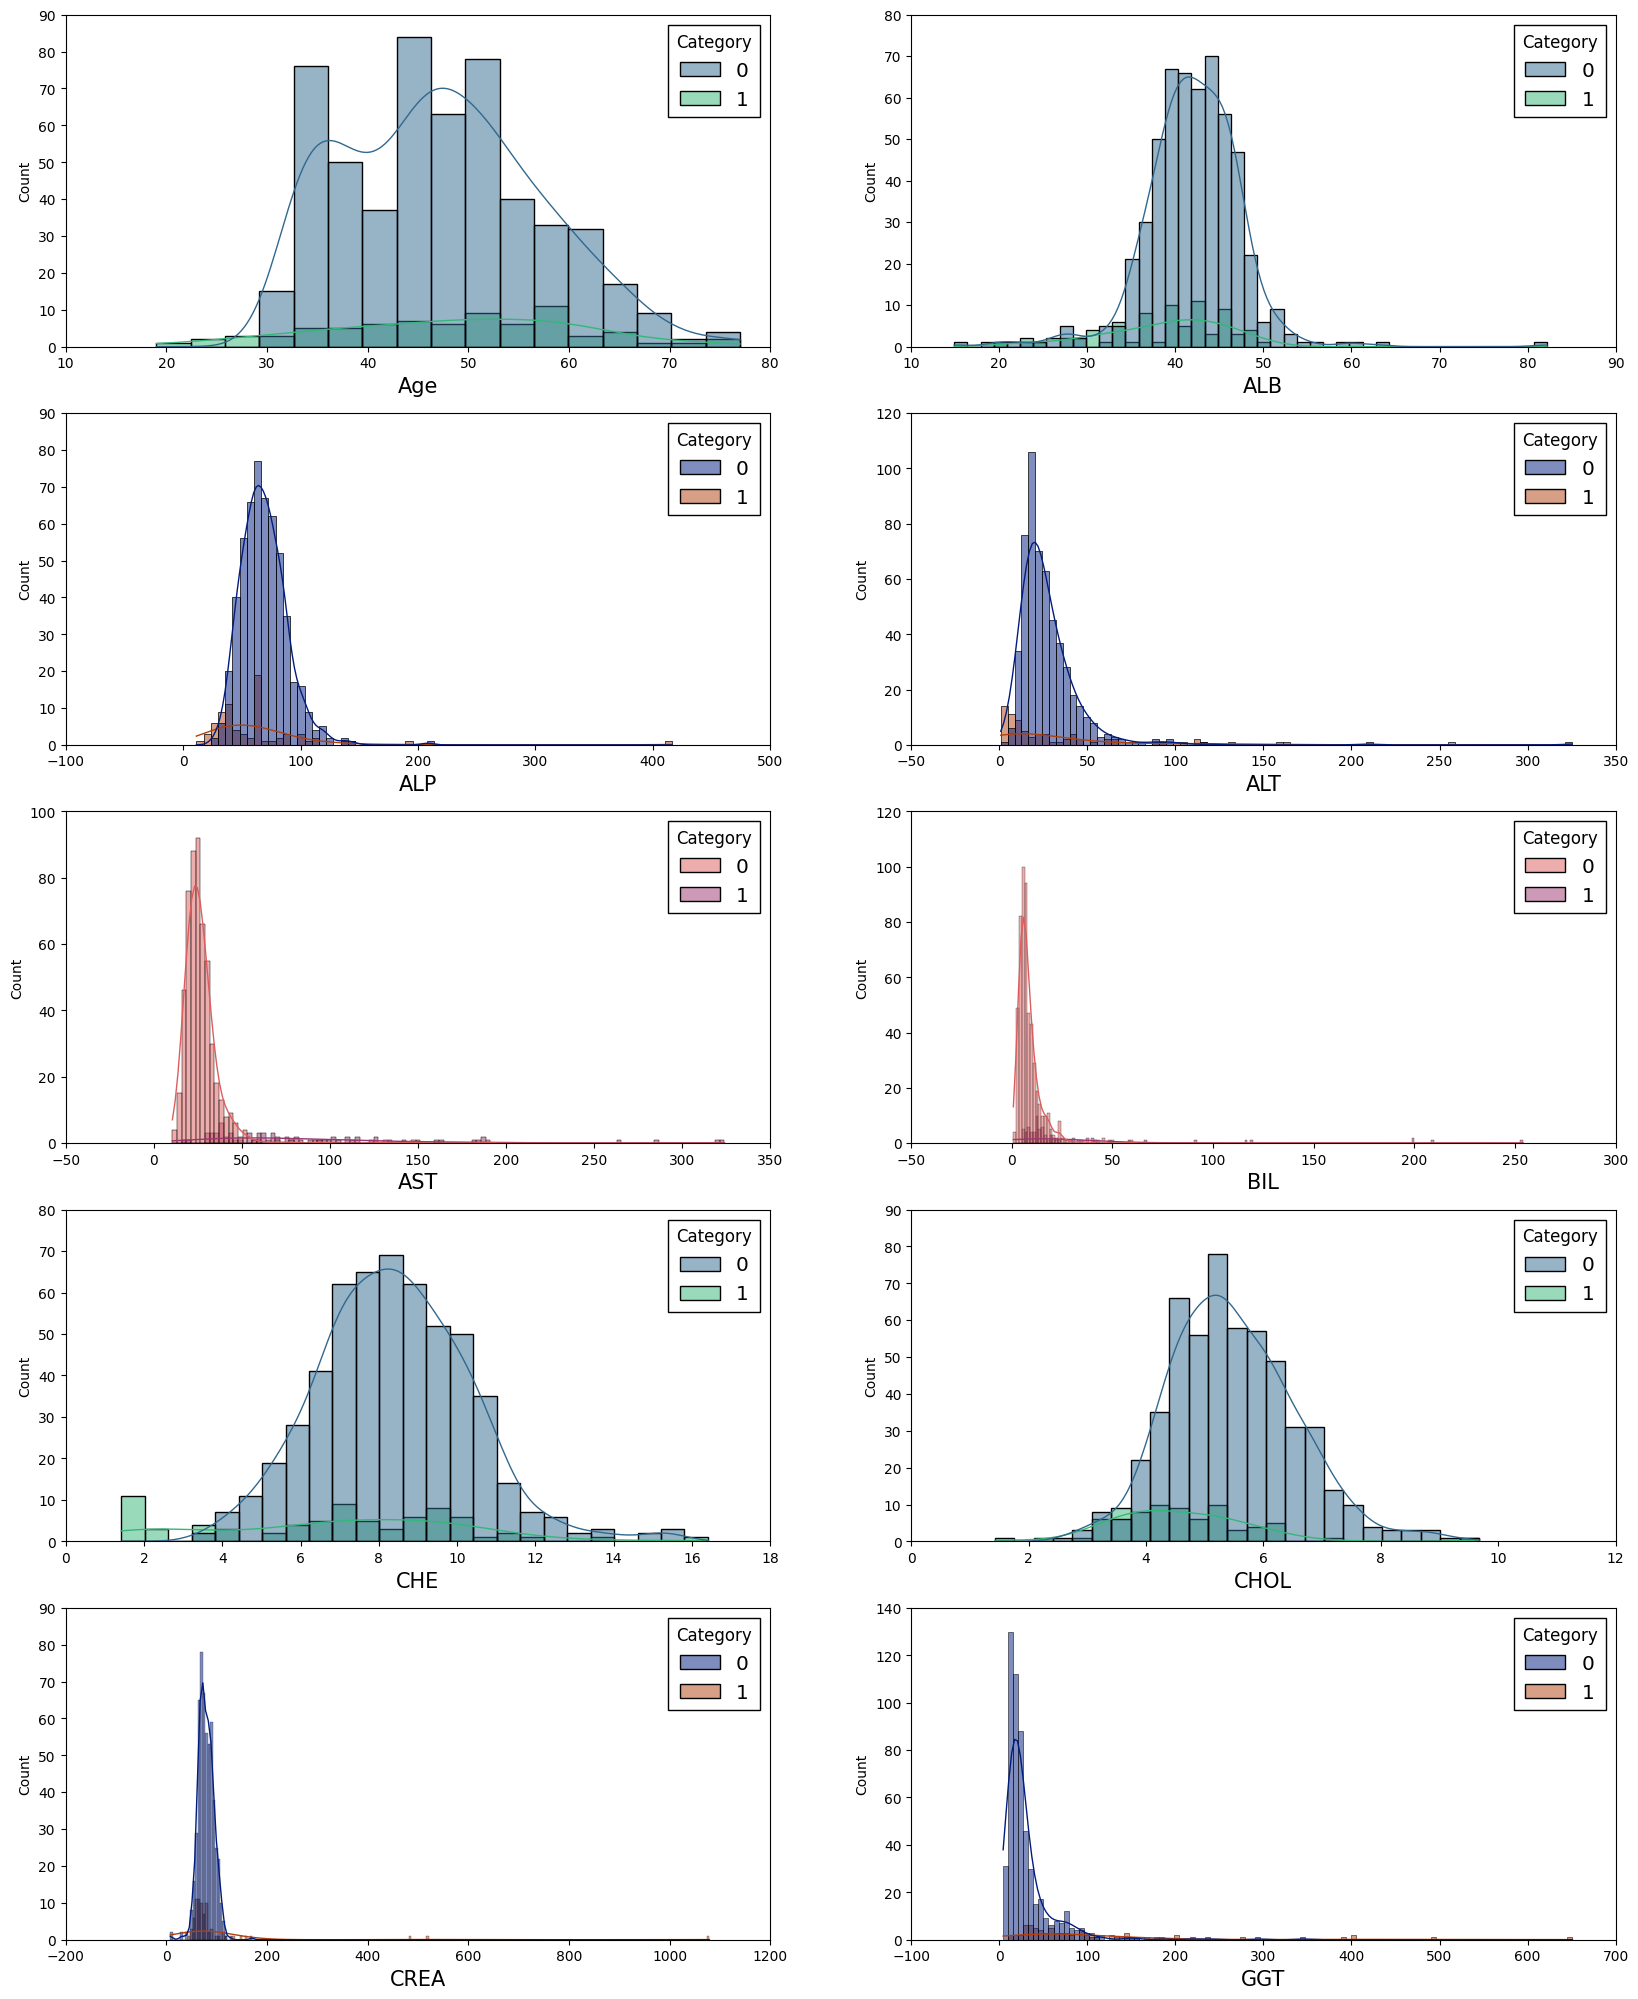

In [29]:
fig, ax =plt.subplots(5,2, figsize=(20,25))
plt.style.use("classic")


sns.histplot(x = df["Age"], hue = df["Category"], palette="viridis", kde=True, ax=ax[0,0]);
ax[0,0].set_xlabel("Age",fontsize=15)

sns.histplot(x = df["ALB"], hue = df["Category"], palette="viridis", kde=True, ax=ax[0,1]);
ax[0,1].set_xlabel("ALB",fontsize=15)


sns.histplot(x = df["ALP"], hue = df["Category"], palette="dark", kde=True, ax=ax[1,0]);
ax[1,0].set_xlabel("ALP",fontsize=15)

sns.histplot(x = df["ALT"], hue = df["Category"], palette="dark", kde=True, ax=ax[1,1]);
ax[1,1].set_xlabel("ALT",fontsize=15)


sns.histplot(x = df["AST"], hue = df["Category"], palette="flare", kde=True, ax=ax[2,0]);
ax[2,0].set_xlabel("AST",fontsize=15)

sns.histplot(x = df["BIL"], hue = df["Category"], palette="flare", kde=True, ax=ax[2,1]);
ax[2,1].set_xlabel("BIL",fontsize=15)


sns.histplot(x = df["CHE"], hue = df["Category"], palette="viridis", kde=True, ax=ax[3,0]);
ax[3,0].set_xlabel("CHE",fontsize=15)

sns.histplot(x = df["CHOL"], hue = df["Category"], palette="viridis", kde=True, ax=ax[3,1]);
ax[3,1].set_xlabel("CHOL",fontsize=15);


sns.histplot(x = df["CREA"], hue = df["Category"], palette="dark", kde=True, ax=ax[4,0]);
ax[4,0].set_xlabel("CREA",fontsize=15)

sns.histplot(x = df["GGT"], hue = df["Category"], palette="dark", kde=True, ax=ax[4,1]);
ax[4,1].set_xlabel("GGT",fontsize=15);

#Splitting the data into Training and Testing

In [30]:
# X data
X = df.drop("Category", axis=1)
X.head()

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,32,1,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,32,1,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,32,1,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,32,1,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,32,1,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [31]:
# y data
y = df["Category"]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Category, dtype: int64

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
len(X_train), len(X_test)

(492, 123)

In [34]:
# Scaling the data

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Model Training

#1. Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [36]:
LogisticRegressionScore = lr.score(X_test, y_test)
print("Accuracy obtained by Logistic Regression model:",LogisticRegressionScore*100)

Accuracy obtained by Logistic Regression model: 88.6178861788618


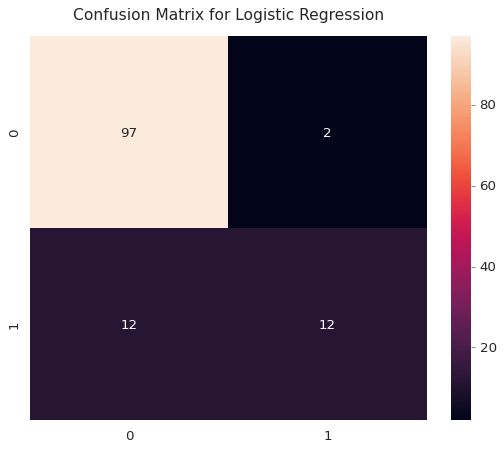

In [38]:
# Having a look at the confusion matrix for Logistic Regression

from sklearn.metrics import confusion_matrix, classification_report
sns.set_style("white")
y_pred_lr = lr.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Logistic Regression", fontsize=14, y=1.03);

In [49]:
# Classification Report

from sklearn import metrics
print(metrics.classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93        99
           1       0.86      0.50      0.63        24

    accuracy                           0.89       123
   macro avg       0.87      0.74      0.78       123
weighted avg       0.88      0.89      0.87       123



#2. Random Forest Classifier

In [40]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [41]:
RandomForestClassifierScore = rfc.score(X_test,y_test)
print("Accacy obtained by Random Forest Classifier :", RandomForestClassifierScore*100)

Accacy obtained by Random Forest Classifier : 93.4959349593496


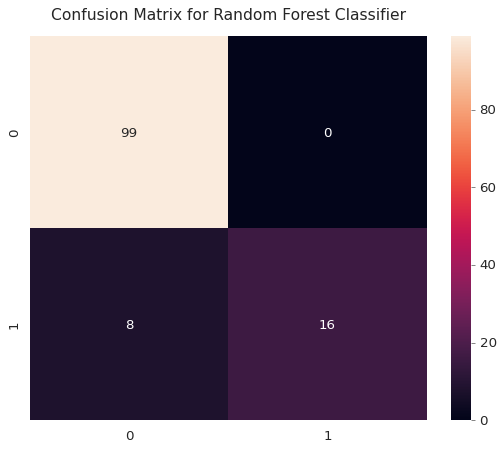

In [42]:
# Confusion Matrix of Random Forest Classifier

y_pred_rfc = rfc.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred_rfc)
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Random Forest Classifier", fontsize=14, y=1.03);

In [48]:
# Classification Report

print(metrics.classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        99
           1       1.00      0.67      0.80        24

    accuracy                           0.93       123
   macro avg       0.96      0.83      0.88       123
weighted avg       0.94      0.93      0.93       123



#3. K Neighbours Classifier

In [44]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [45]:
KNeighborsClassifierScore = knn.score(X_test, y_test)
print("Accuracy obtained by K Neighbors Classifier :", KNeighborsClassifierScore*100)

Accuracy obtained by K Neighbors Classifier : 85.36585365853658


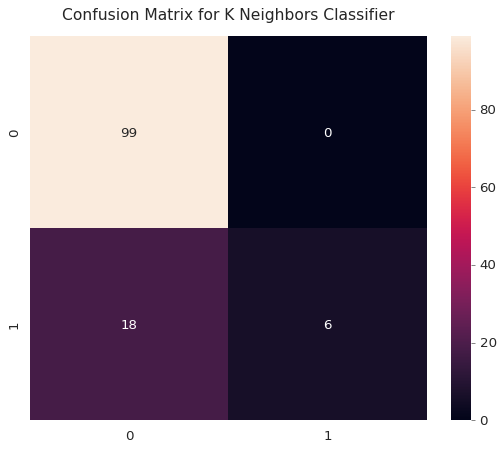

In [46]:
# Confustion Matrix

y_pred_knn = knn.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for K Neighbors Classifier", fontsize=14, y=1.03);

In [47]:
# Classification Report
print(metrics.classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92        99
           1       1.00      0.25      0.40        24

    accuracy                           0.85       123
   macro avg       0.92      0.62      0.66       123
weighted avg       0.88      0.85      0.82       123



#4. Decision Tree Classifier

In [50]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [51]:
DecisionTreeClassifierScore = tree.score(X_test,y_test)
print("Accuracy obtained by Decision Tree Classifier :", DecisionTreeClassifierScore*100)

Accuracy obtained by Decision Tree Classifier : 92.6829268292683


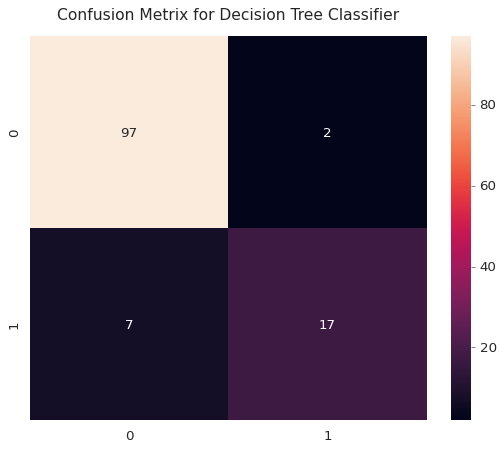

In [53]:
y_pred_tree = tree.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred_tree)
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Metrix for Decision Tree Classifier", fontsize=14, y=1.03);

In [54]:
# Classification Report

print(metrics.classification_report(y_test, y_pred_tree));

              precision    recall  f1-score   support

           0       0.93      0.98      0.96        99
           1       0.89      0.71      0.79        24

    accuracy                           0.93       123
   macro avg       0.91      0.84      0.87       123
weighted avg       0.93      0.93      0.92       123



#5. CatBoost Classifier

In [56]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 9.3 MB/s eta 0:00:00


In [57]:
from catboost import CatBoostClassifier
cat = CatBoostClassifier(iterations=10)
cat.fit(X_train, y_train);

Learning rate set to 0.5
0:	learn: 0.4056594	total: 63.8ms	remaining: 575ms
1:	learn: 0.3052358	total: 74.2ms	remaining: 297ms
2:	learn: 0.2281643	total: 81ms	remaining: 189ms
3:	learn: 0.1874827	total: 96.9ms	remaining: 145ms
4:	learn: 0.1540611	total: 109ms	remaining: 109ms
5:	learn: 0.1302461	total: 122ms	remaining: 81.3ms
6:	learn: 0.1100836	total: 124ms	remaining: 53.3ms
7:	learn: 0.0993443	total: 128ms	remaining: 32.1ms
8:	learn: 0.0894244	total: 132ms	remaining: 14.6ms
9:	learn: 0.0820818	total: 135ms	remaining: 0us


In [58]:
CatBoostClassifierScore = cat.score(X_test,y_test)
print("Accuracy obtained by CatBoost Classifier model:",CatBoostClassifierScore*100)

Accuracy obtained by CatBoost Classifier model: 91.869918699187


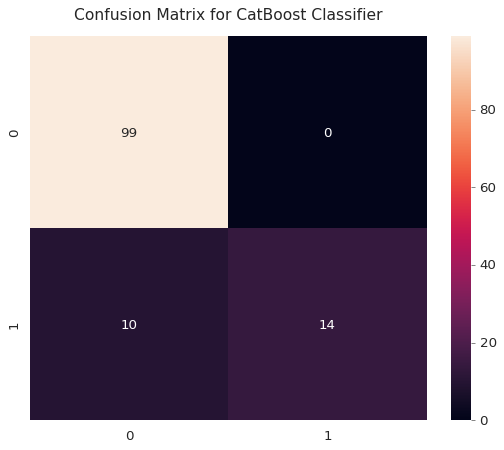

In [60]:
# Confusion matrix
y_pred_cat = cat.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred_cat)
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for CatBoost Classifier", fontsize=14, y=1.03);

In [61]:
# Classification Report of CatBoost Classifier

print(metrics.classification_report(y_test, y_pred_cat))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        99
           1       1.00      0.58      0.74        24

    accuracy                           0.92       123
   macro avg       0.95      0.79      0.84       123
weighted avg       0.93      0.92      0.91       123



#6. Gradient Boosting Classifer

In [62]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

GradientBoostingClassifier()

In [63]:
GradientBoostingClassifierScore = gb.score(X_test,y_test)
print("Accuracy obtained by Gradient Boosting Classifier model:",GradientBoostingClassifierScore*100)

Accuracy obtained by Gradient Boosting Classifier model: 94.3089430894309


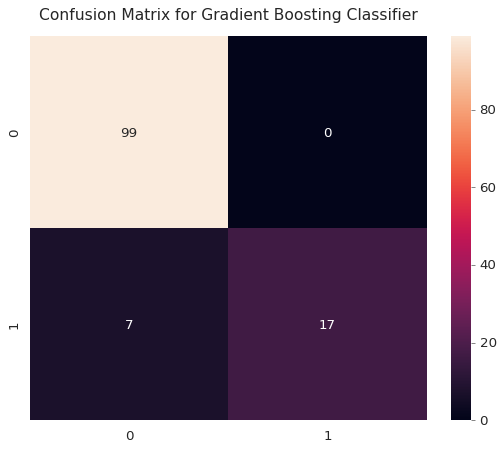

In [64]:
# Confusion matrix
y_pred_gb = gb.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred_gb)
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Gradient Boosting Classifier", fontsize=14, y=1.03);

In [65]:
# Classification Report of Gradient Boosting Classifier

print(metrics.classification_report(y_test, y_pred_gb))

              precision    recall  f1-score   support

           0       0.93      1.00      0.97        99
           1       1.00      0.71      0.83        24

    accuracy                           0.94       123
   macro avg       0.97      0.85      0.90       123
weighted avg       0.95      0.94      0.94       123



#Visualizing the Model Accuracy

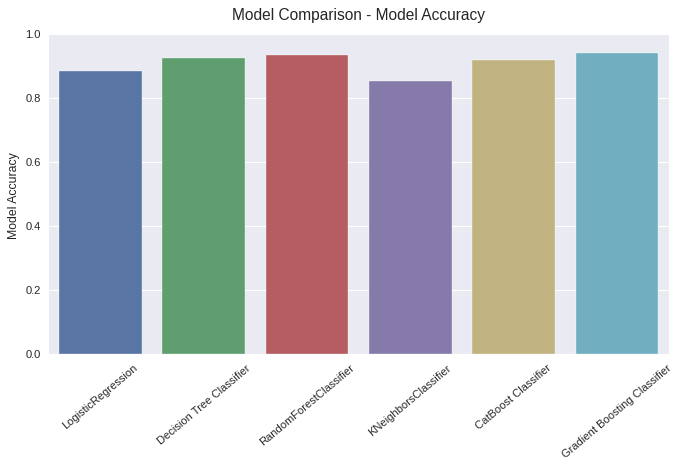

In [67]:
plt.style.use("seaborn")

x = ["LogisticRegression",
     "Decision Tree Classifier",
     "RandomForestClassifier",
     "KNeighborsClassifier",
     "CatBoost Classifier",
     "Gradient Boosting Classifier"]

y = [LogisticRegressionScore,
     DecisionTreeClassifierScore,
     RandomForestClassifierScore,
     KNeighborsClassifierScore,
     CatBoostClassifierScore,
     GradientBoostingClassifierScore]

fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(x=x,y=y);
plt.ylabel("Model Accuracy")
plt.xticks(rotation=40)
plt.title("Model Comparison - Model Accuracy", fontsize=14, y=1.03);

### Hyperparameter Tuning on Random Forest Classifier

In [68]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'criterion' : ['gini', 'entropy'],
    'n_estimators': [100, 200, 300, 1000]
}

grid_search_rfc = GridSearchCV(estimator = rfc,
                           param_grid = param_grid,
                           cv = 3, n_jobs = -1, verbose = 2)

In [69]:
grid_search_rfc.fit(X_train, y_train)

Fitting 3 folds for each of 576 candidates, totalling 1728 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'criterion': ['gini', 'entropy'],
                         'max_depth': [80, 90, 100, 110],
                         'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200, 300, 1000]},
             verbose=2)

In [70]:
grid_search_rfc.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 110,
 'max_features': 2,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 300}

In [71]:
grid_search_rfc.best_score_

0.9735772357723578

In [72]:
grid_search_rfc_predict = grid_search_rfc.predict(X_test)

In [73]:
print('Improvement in Random Forest Classifier after GridSearchCV: {:0.2f}%.'.format(100 * (grid_search_rfc.best_score_ - RandomForestClassifierScore) / RandomForestClassifierScore))

Improvement in Random Forest Classifier after GridSearchCV: 4.13%.


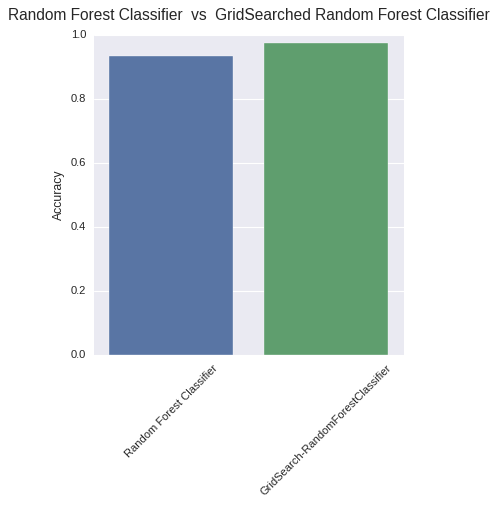

In [115]:
# Comparing the results after the improvement in Random Forest Classifier

plt.style.use("seaborn")

x = ["Random Forest Classifier",
     "GridSearch-RandomForestClassifier"]

y = [RandomForestClassifierScore,
     grid_search_rfc.best_score_]

fig, ax = plt.subplots(figsize=(5,5))
sns.barplot(x=x,y=y);
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.title("Random Forest Classifier  vs  GridSearched Random Forest Classifier", fontsize=14, y=1.03);

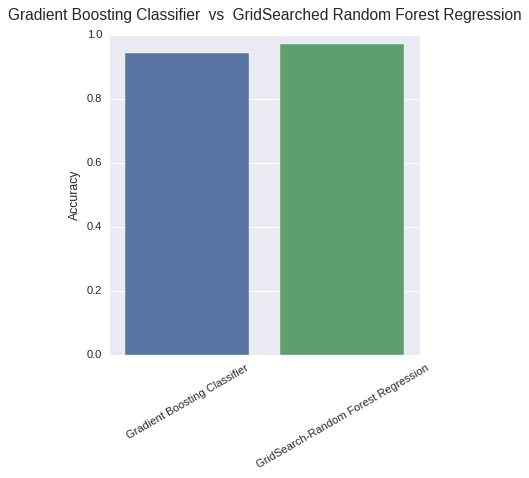

In [78]:
# Comparing the GridSearch-Random Forest Regression and Gradient Boosting Classifier

plt.style.use("seaborn")

x = ["Gradient Boosting Classifier",
     "GridSearch-Random Forest Regression"]

y = [GradientBoostingClassifierScore,
     grid_search_rfc.best_score_]

fig, ax = plt.subplots(figsize=(5,5))
sns.barplot(x=x,y=y);
plt.ylabel("Accuracy")
plt.xticks(rotation=30)
plt.title("Gradient Boosting Classifier  vs  GridSearched Random Forest Regression", fontsize=14, y=1.03);


##### After Hyperparameter tuning, the Random Forest Regression model performs better than the Gradient Boosting Classifier which was not the case before!

In [77]:
# Classification Report of GridSearch-RandomForestRegression

print(classification_report(y_test, grid_search_rfc_predict))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        99
           1       1.00      0.58      0.74        24

    accuracy                           0.92       123
   macro avg       0.95      0.79      0.84       123
weighted avg       0.93      0.92      0.91       123



In [86]:
rf = RandomForestClassifier(n_estimators=10)
rf.fit(X_train, y_train)
predrf = rf.predict(X_test)

rfmean = cross_val_score(estimator=rf, X=X_train, y=y_train, cv =3)
print(f"Random Forest Accuracy : {rfmean.mean()}\n")

Random Forest Accuracy : 0.9735772357723578



In [91]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
preddt = dt.predict(X_test)

dtmean = cross_val_score(estimator=dt, X=X_train, y=y_train, cv =3)
print(f"Decision Trees Accuracy : {dtmean.mean()}\n")

Decision Trees Accuracy : 0.9634146341463414



# Approach - 2

In [95]:
data = df.copy()

In [96]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  615 non-null    int64  
 1   Category    615 non-null    object 
 2   Age         615 non-null    int64  
 3   Sex         615 non-null    object 
 4   ALB         614 non-null    float64
 5   ALP         597 non-null    float64
 6   ALT         614 non-null    float64
 7   AST         615 non-null    float64
 8   BIL         615 non-null    float64
 9   CHE         615 non-null    float64
 10  CHOL        605 non-null    float64
 11  CREA        615 non-null    float64
 12  GGT         615 non-null    float64
 13  PROT        614 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 67.4+ KB


In [97]:
data.nunique()

Unnamed: 0    615
Category        5
Age            49
Sex             2
ALB           189
ALP           414
ALT           341
AST           297
BIL           188
CHE           407
CHOL          313
CREA          117
GGT           358
PROT          198
dtype: int64

## Dropping Unnamed column as it contains all unique values and does not has no effect in the prediction

In [98]:
data= data.drop(["Unnamed: 0"], axis=1)
data.head()

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [99]:
data.isnull().sum()

Category     0
Age          0
Sex          0
ALB          1
ALP         18
ALT          1
AST          0
BIL          0
CHE          0
CHOL        10
CREA         0
GGT          0
PROT         1
dtype: int64

## Making a new column for dependent variable with new values as 0, 1, 2

In [100]:
li = list(data["Category"])
li2 = []
for i in range(len(li)) :
    if li[i] == "0=Blood Donor":
            li2.append(0)
    elif li[i] == "0s=suspect Blood Donor":
        li2.append(1)
    elif li[i] == "1=Hepatitis":
        li2.append(2)
    else :
        li2.append(3)
data["NewCat"]= li2

## Dropping the old dependent variable column

In [101]:
data =data.drop(["Category"], axis =1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     615 non-null    int64  
 1   Sex     615 non-null    object 
 2   ALB     614 non-null    float64
 3   ALP     597 non-null    float64
 4   ALT     614 non-null    float64
 5   AST     615 non-null    float64
 6   BIL     615 non-null    float64
 7   CHE     615 non-null    float64
 8   CHOL    605 non-null    float64
 9   CREA    615 non-null    float64
 10  GGT     615 non-null    float64
 11  PROT    614 non-null    float64
 12  NewCat  615 non-null    int64  
dtypes: float64(10), int64(2), object(1)
memory usage: 62.6+ KB


## Dividing data into X and y

In [102]:
X = data.iloc[:,0:12].values
y = data.iloc[:, -1].values

## Applying One Hot Encoding on columns with categorical data

In [103]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer(transformers=[("encoder", OneHotEncoder(), [1])], remainder="passthrough")
X = np.array(ct.fit_transform(X))

## Dealing with missing values using simple imputer, to fill na values in PROT, ALB, ALP, CHOL, ALT

In [104]:
from sklearn.impute import SimpleImputer
si = SimpleImputer(missing_values = np.nan, strategy ='mean')
si = si.fit(X[:, 0:13 ])
X[:, 0:13 ] = si.transform(X[:, 0:13 ])

## Splitting in Training and Test sets

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Scaling down data using Standardization

In [110]:
ss=StandardScaler()
X_test= ss.fit_transform(X_test)
X_train = ss.fit_transform(X_train)

## Training Models

#### 1. XGB CLASSIFER

In [109]:
from xgboost import XGBClassifier
xg = XGBClassifier()
xg.fit(X_train, y_train)
y_predxg = xg.predict(X_test)

#### 2. RANDOM FOREST CLASSIFER

In [111]:
rf = RandomForestClassifier(n_estimators=10)
rf.fit(X_train, y_train)
predrf = rf.predict(X_test)

#### 3. DECISION TREE CLASSIFER

In [112]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
preddt = dt.predict(X_test)

#### 4. LOGISTIC REGRESSION

In [113]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
predlr = lr.predict(X_test)

## Scoring accuracy of different models

In [114]:
xgmean = cross_val_score(estimator=xg, X=X_train, y=y_train, cv =3)
print(f"XGBoost Accuracy : {xgmean.mean()}\n")

lrmean = cross_val_score(estimator=lr, X=X_train, y=y_train, cv =3)
print(f"Logistic Regresion Accuracy : {lrmean.mean()}\n")

rfmean = cross_val_score(estimator=rf, X=X_train, y=y_train, cv =3)
print(f"Random Forest Accuracy : {rfmean.mean()}\n")

dtmean = cross_val_score(estimator=dt, X=X_train, y=y_train, cv =3)
print(f"Decision Trees Accuracy : {dtmean.mean()}\n")

XGBoost Accuracy : 0.9532520325203251

Logistic Regresion Accuracy : 0.9471544715447154

Random Forest Accuracy : 0.9390243902439024

Decision Trees Accuracy : 0.9349593495934959



# Approach - 3

In [121]:
df = pd.read_csv('/content/drive/MyDrive/data/data.csv')

In [122]:
df.head()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  615 non-null    int64  
 1   Category    615 non-null    object 
 2   Age         615 non-null    int64  
 3   Sex         615 non-null    object 
 4   ALB         614 non-null    float64
 5   ALP         597 non-null    float64
 6   ALT         614 non-null    float64
 7   AST         615 non-null    float64
 8   BIL         615 non-null    float64
 9   CHE         615 non-null    float64
 10  CHOL        605 non-null    float64
 11  CREA        615 non-null    float64
 12  GGT         615 non-null    float64
 13  PROT        614 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 67.4+ KB


In [124]:
df.nunique()

Unnamed: 0    615
Category        5
Age            49
Sex             2
ALB           189
ALP           414
ALT           341
AST           297
BIL           188
CHE           407
CHOL          313
CREA          117
GGT           358
PROT          198
dtype: int64

In [125]:
print(df.isnull().sum())

Unnamed: 0     0
Category       0
Age            0
Sex            0
ALB            1
ALP           18
ALT            1
AST            0
BIL            0
CHE            0
CHOL          10
CREA           0
GGT            0
PROT           1
dtype: int64


In [126]:
df['ALB'].fillna(df['ALB'].mean(), inplace=True)
df['ALP'].fillna(df['ALP'].mean(), inplace=True)
df['CHOL'].fillna(df['CHOL'].mean(), inplace=True)
df['PROT'].fillna(df['PROT'].mean(), inplace=True)
df['ALT'].fillna(df['ALT'].mean(), inplace=True)
df = df.drop('Unnamed: 0', axis=1)

print(df.isnull().sum())

Category    0
Age         0
Sex         0
ALB         0
ALP         0
ALT         0
AST         0
BIL         0
CHE         0
CHOL        0
CREA        0
GGT         0
PROT        0
dtype: int64


In [127]:
df['Category'] = df['Category'].replace({'0=Blood Donor': 0, '0s=suspect Blood Donor': 0, '1=Hepatitis': 1, '2=Fibrosis': 1, '3=Cirrhosis': 1})

df['Sex'] = df['Sex'].replace({'m': 0, 'f': 1})

In [128]:
df.head()

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0,32,0,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0,32,0,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0,32,0,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0,32,0,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0,32,0,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [129]:
# Value counts of categorical variables
print(df['Category'].value_counts())
print(df['Sex'].value_counts())

0    540
1     75
Name: Category, dtype: int64
0    377
1    238
Name: Sex, dtype: int64


In [130]:
col=['Category', 'Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE',
       'CHOL', 'CREA', 'GGT', 'PROT']

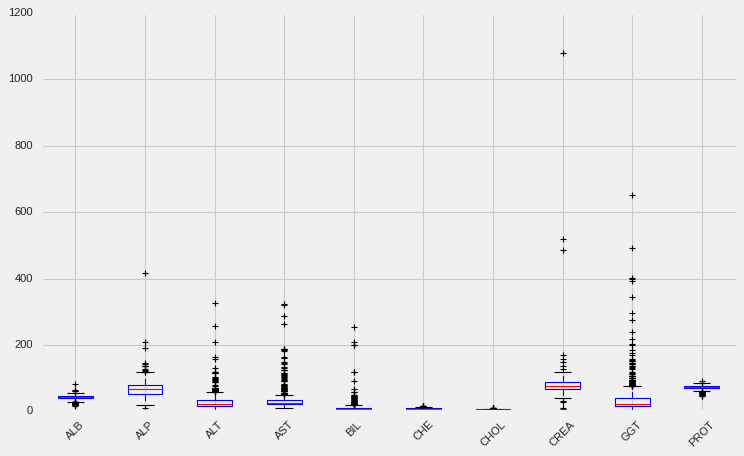

In [131]:
# create a list of the columns to plot
columns_to_plot = ['ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']

# create a box plot for each column
plt.figure(figsize=(10,6))
plt.boxplot(df[columns_to_plot].values, labels=columns_to_plot, showfliers=True)
plt.xticks(rotation=45)
plt.show()

In [132]:
q_low = df[col].quantile(0.01)
q_hi  = df[col].quantile(0.99)

df_outliers = df[(df[col] < q_low) | (df[col] > q_hi)]
outlier_percentage = (df_outliers.sum() / len(df_outliers)) * 100
print(outlier_percentage)

Category      0.000000
Age         103.089431
Sex           0.000000
ALB          88.829268
ALP         249.382114
ALT         223.723577
AST         300.227642
BIL         195.300813
CHE          19.108943
CHOL         13.222764
CREA        471.544715
GGT         490.926829
PROT        152.943089
dtype: float64


In [133]:
from sklearn.preprocessing import RobustScaler

# Create a RobustScaler object
robust_scaler = RobustScaler()

# Define the columns to be scaled using RobustScaler
cols_to_scale = ['ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']

# Scale the selected columns using RobustScaler
df[cols_to_scale] = robust_scaler.fit_transform(df[cols_to_scale])

In [134]:
q_low = df[col].quantile(0.01)
q_hi  = df[col].quantile(0.99)

df_outliers = df[(df[col] < q_low) | (df[col] > q_hi)]
outlier_percentage = (df_outliers.sum() / len(df_outliers)) * 100
print(outlier_percentage)

Category      0.000000
Age         103.089431
Sex           0.000000
ALB           0.040650
ALP           3.701887
ALT          10.292243
AST          21.351176
BIL          30.486427
CHE           0.115138
CHOL          0.790912
CREA         14.107627
GGT          17.872905
PROT         -1.871251
dtype: float64


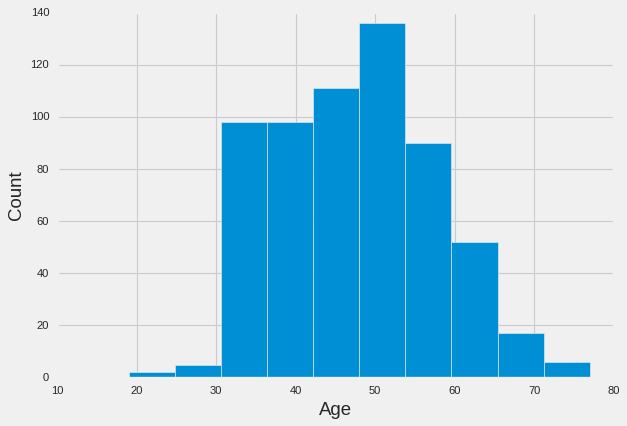

In [135]:
plt.hist(df['Age'])
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

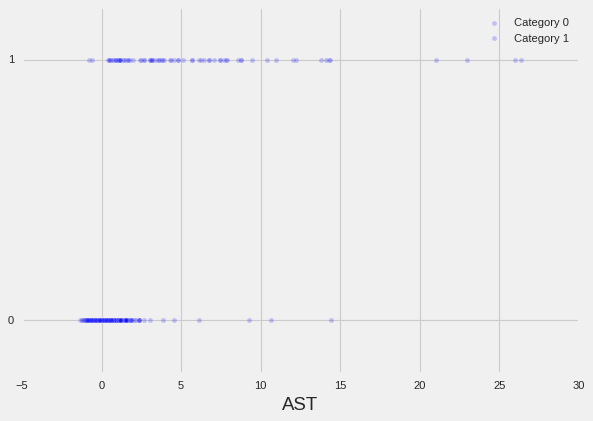

In [136]:
# filter data by category 0 or 1
df_cat0 = df[df['Category']==0]
df_cat1 = df[df['Category']==1]

# plot the scatter plot for category 0 and 1 separately
plt.scatter(df_cat0['AST'], np.zeros_like(df_cat0['AST']), alpha=0.2, label='Category 0')
plt.scatter(df_cat1['AST'], np.zeros_like(df_cat1['AST'])+1, alpha=0.2, label='Category 1')
plt.xlabel('AST')
plt.yticks([0,1])
plt.legend()
plt.show()

Total Suspected Patients : 540 
Total Healthy Patients : 75 


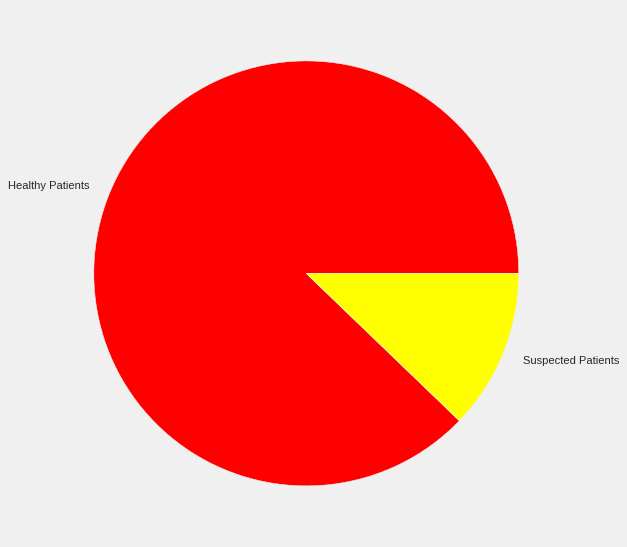

In [137]:
print ('Total Suspected Patients : {} '.format(df.Category.value_counts()[0]))
print ('Total Healthy Patients : {} '.format(df.Category.value_counts()[1]))
fig, ax = plt.subplots(figsize=(8,8))

plt.pie(x=df["Category"].value_counts(),
        colors=["red","yellow"],
        labels=["Healthy Patients","Suspected Patients"],
        )

plt.show()

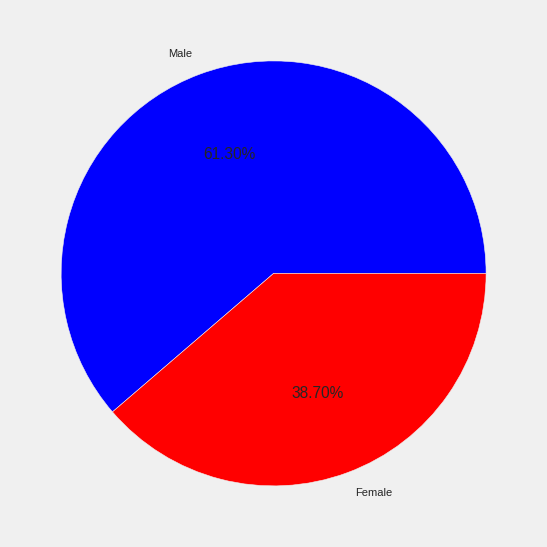

In [138]:
fig, ax = plt.subplots(figsize=(8,8))
plt.pie(x=df["Sex"].value_counts(),
        colors=["blue","red"],
        labels=["Male","Female"],
        autopct="%1.2f%%",
        )
plt.show()

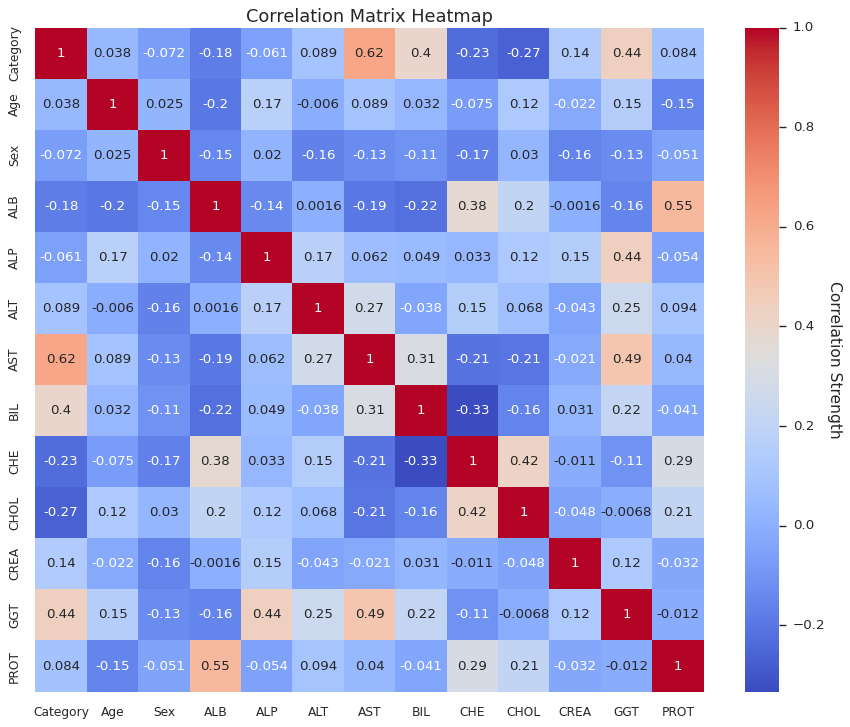

In [139]:
sns.set(style="whitegrid")
correlation_matrix = df.corr()
fig, ax = plt.subplots(figsize=(12, 10))
plt.title("Correlation Matrix Heatmap", fontsize=16)
sns.heatmap(correlation_matrix, annot=True, annot_kws={"size": 12}, cmap='coolwarm', ax=ax)
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=12)
cbar.set_label('Correlation Strength', rotation=270, fontsize=14, labelpad=15)
plt.show()

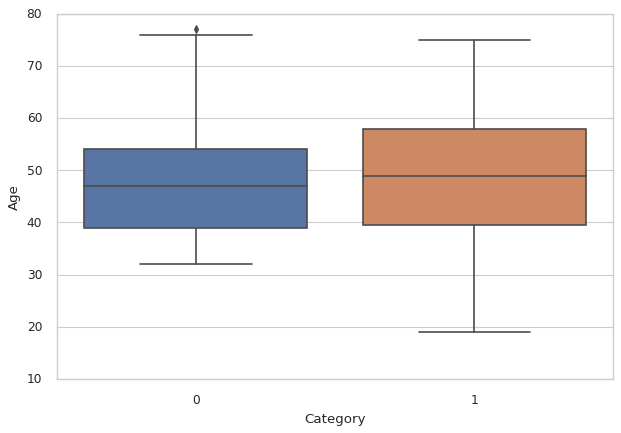

In [140]:
sns.boxplot(x="Category", y="Age", data=df)
plt.show()

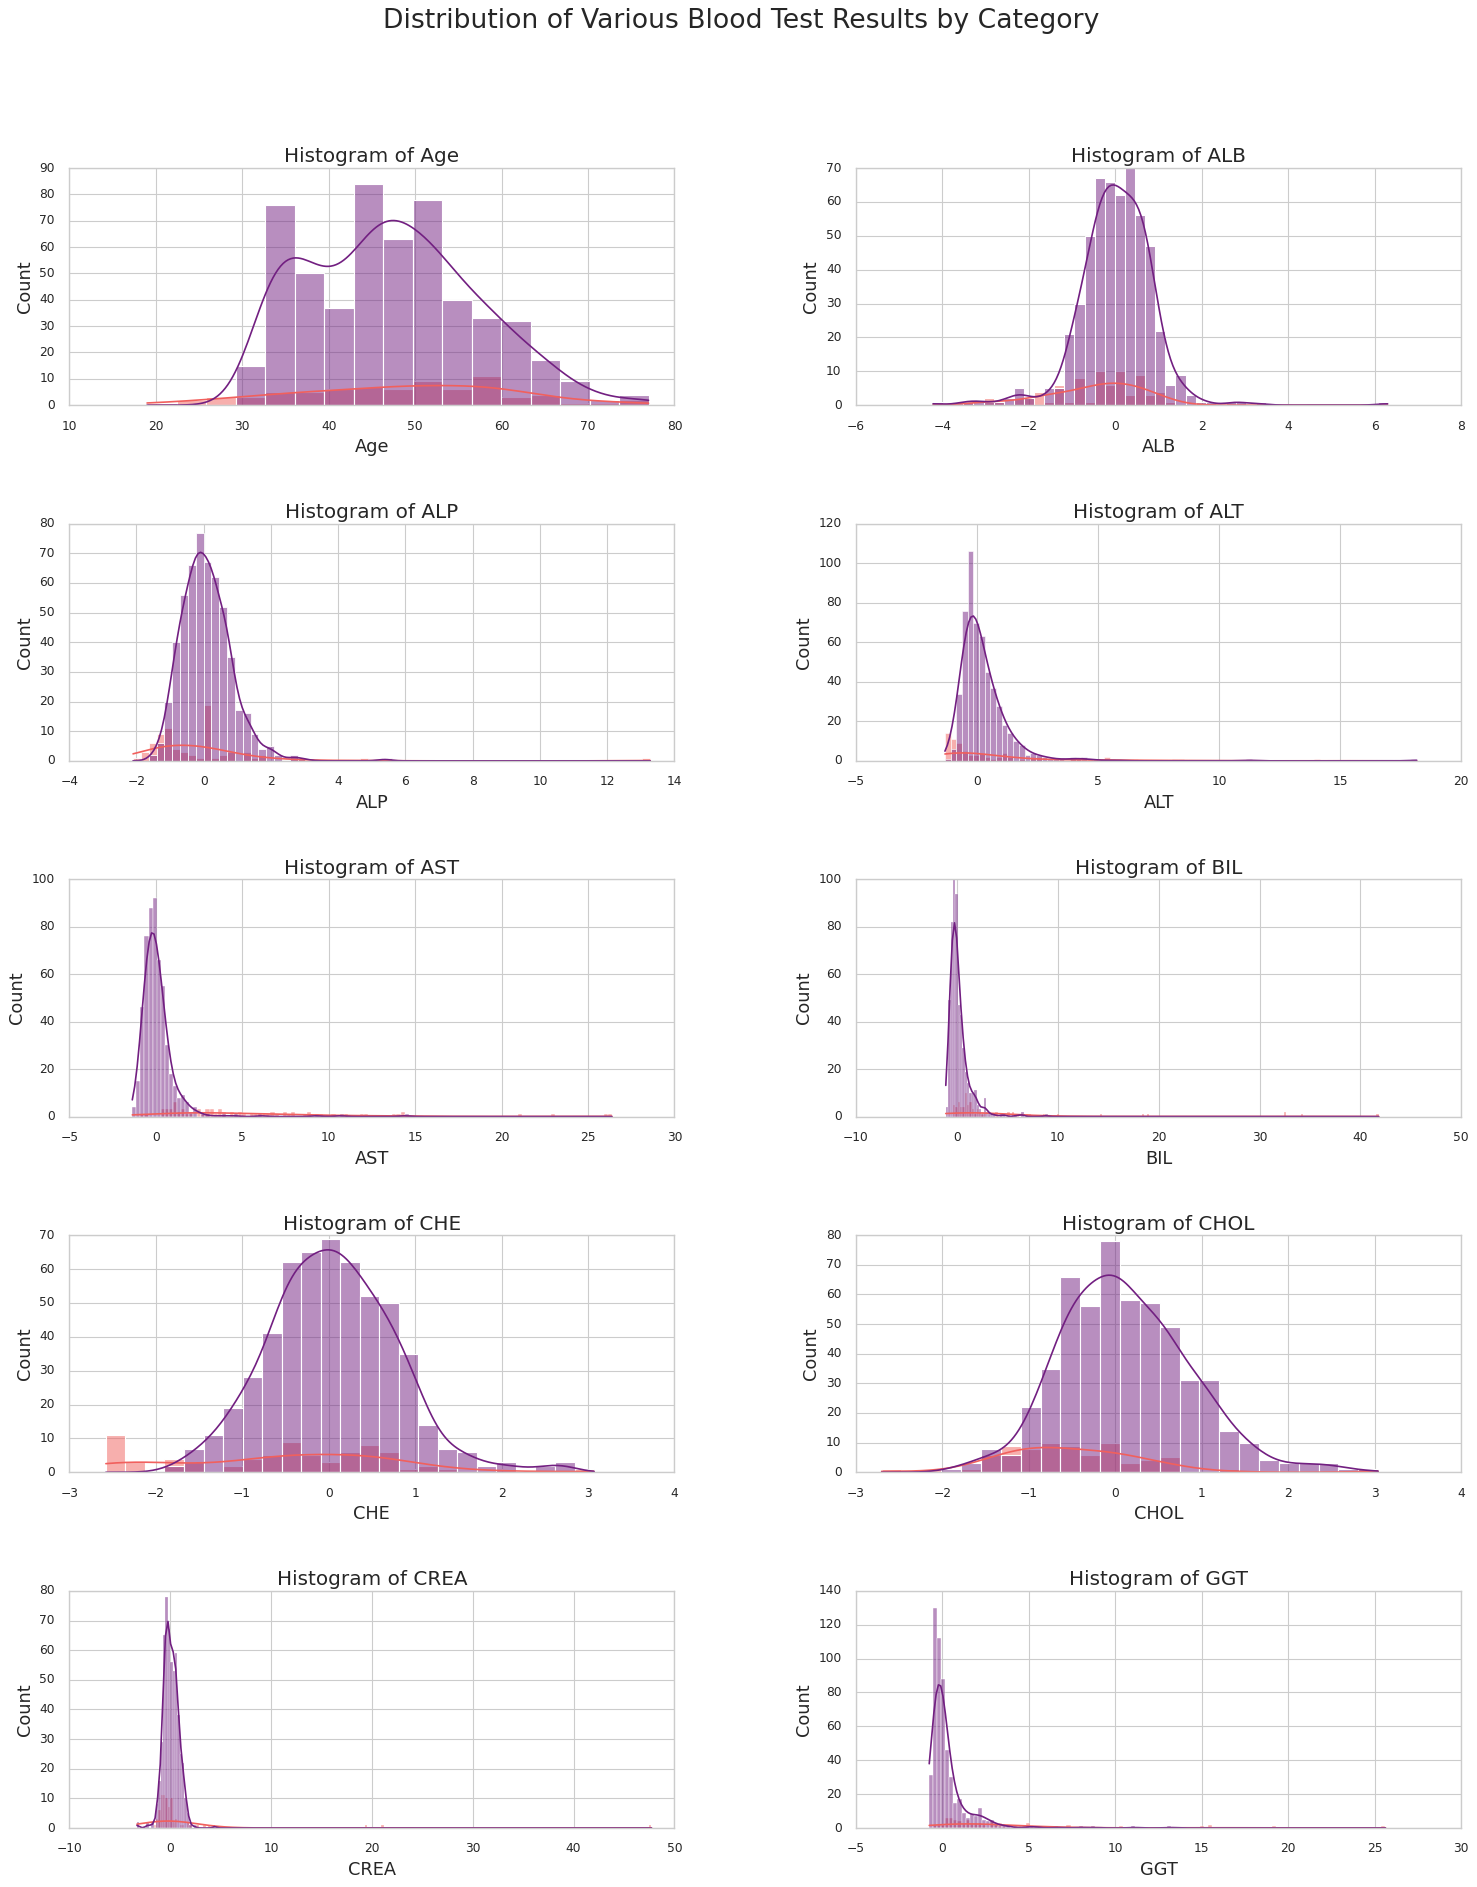

In [141]:
# Set up the figure and axes
fig, axes = plt.subplots(5, 2, figsize=(20, 25))
axes = axes.flatten()

# Define the columns to plot
columns = ["Age", "ALB", "ALP", "ALT", "AST", "BIL", "CHE", "CHOL", "CREA", "GGT"]

# Loop over each column and plot a histogram with multiple categories
for i, col in enumerate(columns):
    sns.histplot(x=df[col], hue=df["Category"], kde=True, palette="magma", ax=axes[i])
    axes[i].set_xlabel(col, fontsize=16)  # increase x-axis label font size
    axes[i].set_ylabel("Count", fontsize=16)  # increase y-axis label font size
    axes[i].set_title(f"Histogram of {col}", fontsize=18)  # increase title font size
    axes[i].legend(fontsize=14)  # increase legend font size

# Add a main title to the figure
fig.suptitle("Distribution of Various Blood Test Results by Category", fontsize=24)

# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0.5, wspace=0.3)  # add more spacing between subplots

In [142]:
X = df.drop("Category", axis=1)
y = df["Category"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [160]:
X

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,32,0,-0.531250,-0.538899,-0.918919,-0.336283,0.033898,-0.500942,-1.449477,1.380952,-0.457143,-0.524590
1,32,0,-0.531250,0.136622,-0.300300,-0.106195,-0.576271,1.096045,-0.355401,-0.142857,-0.314286,0.704918
2,32,0,0.781250,0.303605,0.792793,2.362832,-0.203390,0.218456,-0.076655,0.428571,0.404082,1.163934
3,32,0,0.203125,-0.557875,0.456456,-0.292035,1.966102,-0.350282,-0.397213,0.142857,0.428571,0.573770
4,32,0,-0.421875,0.280835,0.576577,-0.097345,0.389831,0.335217,-0.689895,-0.047619,0.269388,-0.573770
...,...,...,...,...,...,...,...,...,...,...,...,...
610,62,1,-1.546875,13.278937,-1.027027,7.469027,7.237288,-1.013183,0.689895,-1.014286,25.616327,-0.606557
611,64,1,-2.796875,1.370019,-1.207207,1.637168,2.152542,-2.531073,-1.595819,-0.666667,0.514286,-0.147541
612,64,1,-2.015625,0.781784,-1.171171,6.469027,6.898305,-2.485876,-1.170732,-0.490476,1.669388,1.606557
613,46,1,-1.390625,0.060111,0.960961,3.194690,2.152542,-1.770245,-0.773519,-1.190476,1.089796,-0.196721


In [144]:
import joblib

# define a list of models to train and their corresponding hyperparameters to tune
models = [
    {
        "name": "Logistic Regression",
        "estimator": LogisticRegression(),
        "hyperparameters": {
            "penalty": ["l2"],
            "C": [0.01, 0.1, 1, 10],
            "max_iter": [500]
        }
    },
    {
        "name": "Random Forest",
        "estimator": RandomForestClassifier(),
        "hyperparameters": {
            "n_estimators": [100, 200, 300],
            "max_depth": [5, 10, 20, None]
        }
    },
    {
        "name": "Gradient Boosting",
        "estimator": GradientBoostingClassifier(),
        "hyperparameters": {
            "n_estimators": [100, 200, 300],
            "learning_rate": [0.01, 0.1, 1],
            "max_depth": [3, 5, 10]
        }
    },
    {
        "name": "Support Vector Machine",
        "estimator": SVC(),
        "hyperparameters": {
            "C": [0.01, 0.1, 1, 10],
            "kernel": ["linear", "rbf", "sigmoid"],
            "gamma": ["scale", "auto"]
        }
    }

]

In [145]:
# train and tune each model
accuracies = []
best_models = {}
for model in models:
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        print(f"Training {model['name']}...")
        grid_search = GridSearchCV(
            estimator=model['estimator'],
            param_grid=model['hyperparameters'],
            scoring='accuracy',
            cv=5
        )
        grid_search.fit(X_train, y_train)

        # evaluate the model's performance
        best_model = grid_search.best_estimator_
        y_pred = best_model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        conf_matrix = confusion_matrix(y_test, y_pred)

        accuracies.append((model['name'], accuracy))
        best_models[model['name']] = best_model

        print(f"Best parameters for {model['name']}: {grid_search.best_params_}")
        print(f"Accuracy for {model['name']}: {accuracy}")

Training Logistic Regression...
Best parameters for Logistic Regression: {'C': 10, 'max_iter': 500, 'penalty': 'l2'}
Accuracy for Logistic Regression: 0.9024390243902439
Training Random Forest...
Best parameters for Random Forest: {'max_depth': None, 'n_estimators': 200}
Accuracy for Random Forest: 0.926829268292683
Training Gradient Boosting...
Best parameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}
Accuracy for Gradient Boosting: 0.9349593495934959
Training Support Vector Machine...
Best parameters for Support Vector Machine: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
Accuracy for Support Vector Machine: 0.9024390243902439


In [146]:
# create the Logistic Regression model with the best hyperparameters
log_reg_model = LogisticRegression(
    C=10,
    max_iter=500,
    penalty='l2'
)

# create the Random Forest model with the best hyperparameters
rf_model = RandomForestClassifier(
    max_depth=10,
    n_estimators=300
)

# create the Gradient Boosting model with the best hyperparameters
gb_model = GradientBoostingClassifier(
    learning_rate=0.1,
    max_depth=3,
    n_estimators=100
)

# create the Support Vector Machine model with the best hyperparameters
svm_model = SVC(
    C=10,
    gamma='scale',
    kernel='linear'
)

In [147]:
# train the Logistic Regression model on the training data
log_reg_model.fit(X_train, y_train)

# make predictions on the testing data
y_pred_log_reg = log_reg_model.predict(X_test)

# train the Random Forest model on the training data
rf_model.fit(X_train, y_train)

# make predictions on the testing data
y_pred_rf = rf_model.predict(X_test)

# train the Gradient Boosting model on the training data
gb_model.fit(X_train, y_train)

# make predictions on the testing data
y_pred_gb = gb_model.predict(X_test)

# train the Support Vector Machine model on the training data
svm_model.fit(X_train, y_train)

# make predictions on the testing data
y_pred_svm = svm_model.predict(X_test)

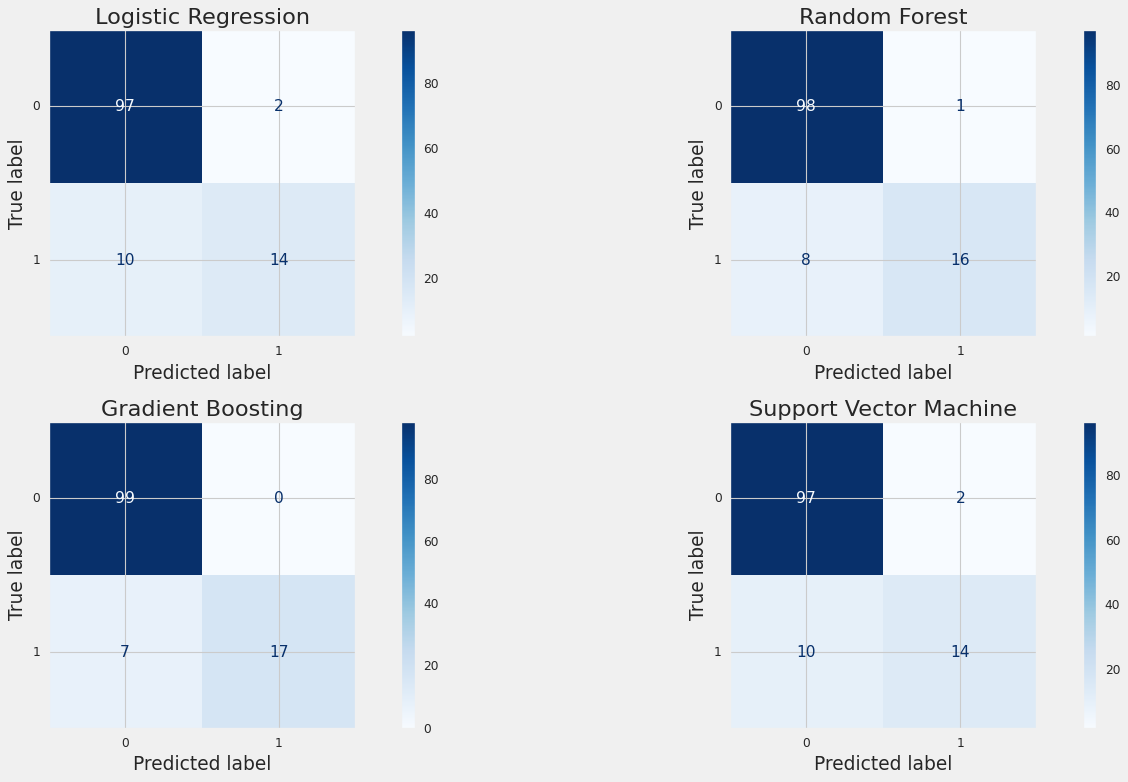

In [154]:
# define the models and their names
models = {
    'Logistic Regression': log_reg_model,
    'Random Forest': rf_model,
    'Gradient Boosting': gb_model,
    'Support Vector Machine': svm_model
}

# create a subplot grid with 2 rows and 2 columns
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))

# iterate over the models and plot the confusion matrix in the corresponding subplot
for i, (name, model) in enumerate(models.items()):
    row = i // 2
    col = i % 2
    disp = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap='Blues', ax=axs[row, col])
    disp.ax_.set_title(name)

plt.tight_layout()
plt.show()

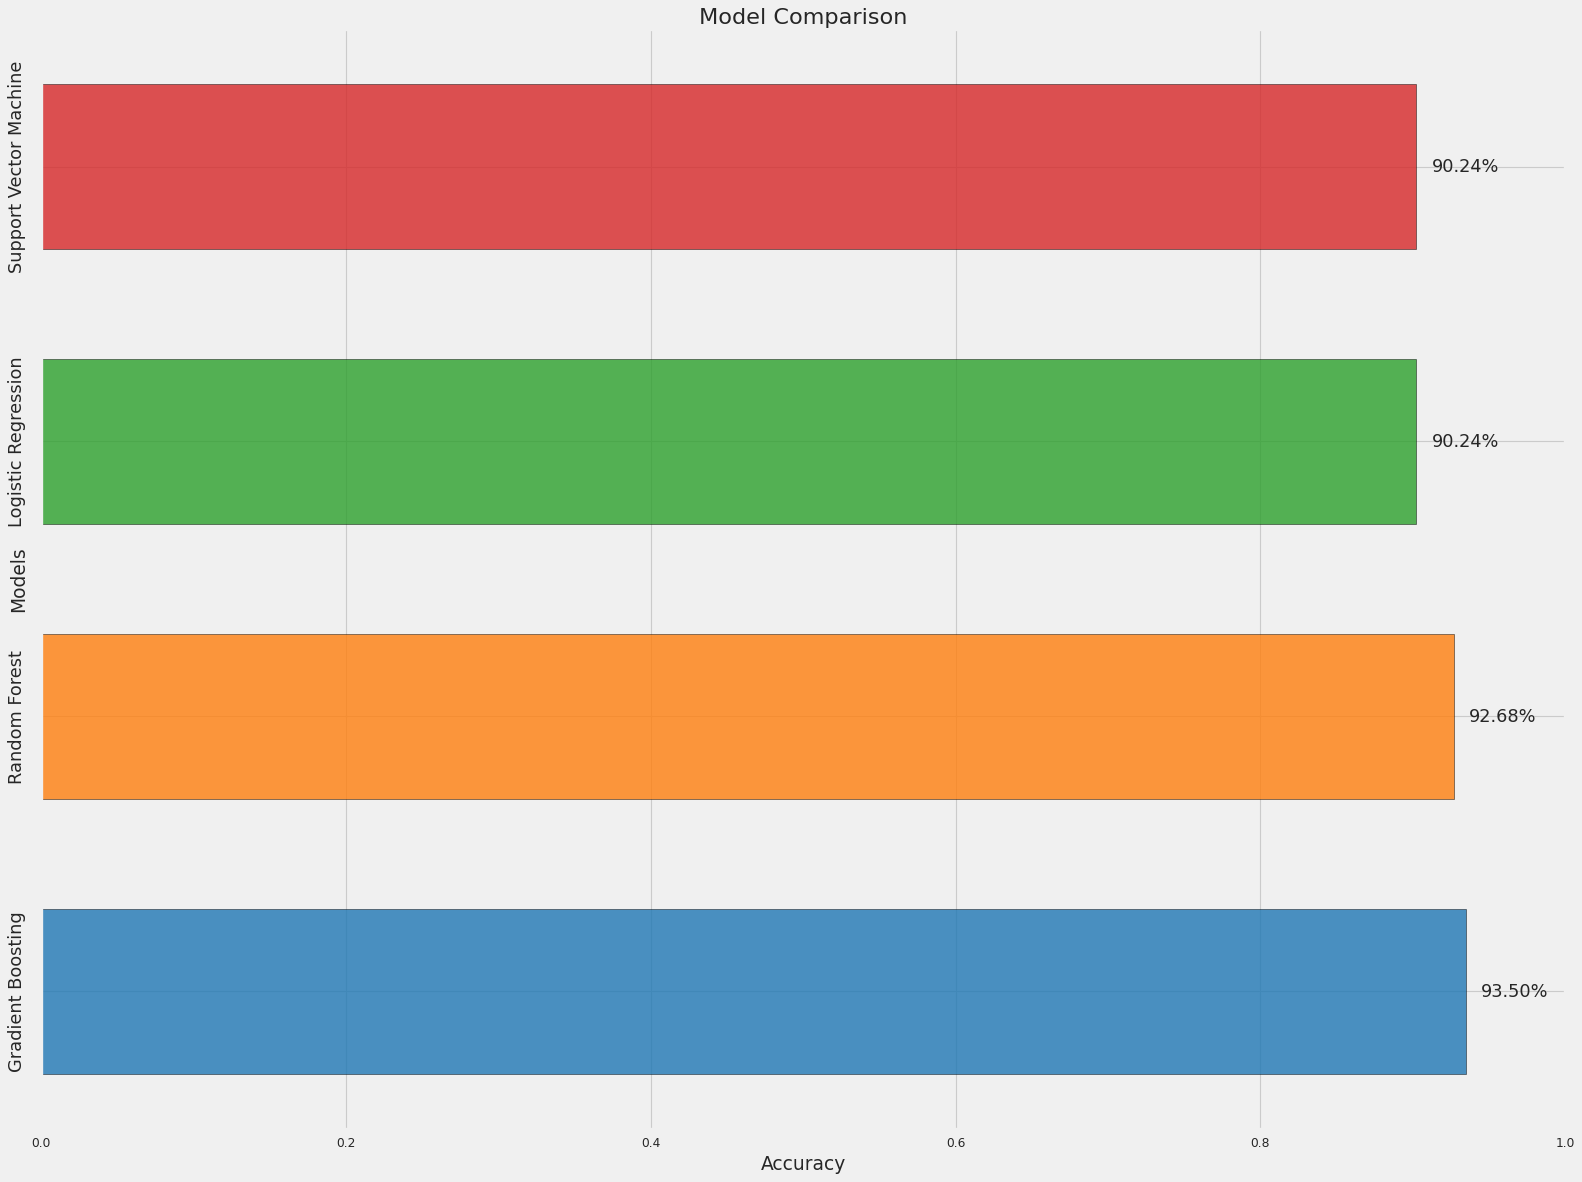

In [155]:
# Sort accuracies in descending order
accuracies.sort(key=lambda x: x[1], reverse=True)

# Extract model names and accuracies
names, values = zip(*accuracies)

# Set color scheme
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple']

# Create bar chart
fig, ax = plt.subplots(figsize=(20, 15))
ax.barh(range(len(names)), values, color=colors, edgecolor='black', height=0.6, alpha=0.8, capsize=5, tick_label='')

# Add labels to the bars
for i, (name, acc) in enumerate(zip(names, values)):
    ax.text(acc + 0.01, i, f"{acc:.2%}", ha='left', va='center', fontsize=16)
    ax.text(-0.01, i, name, ha='right', va='center', fontsize=16, rotation=90)

# Set axis labels and title
ax.set_xlabel('Accuracy')
ax.set_ylabel('Models')
ax.set_title('Model Comparison')


# Adjust layout and save plot
plt.subplots_adjust(left=0.3)
plt.tight_layout()
plt.savefig('model_comparison.png', dpi=300)
plt.show()

In [156]:
accuracy = gb_model.score(X_test, y_test)
print(f"Accuracy of gb_model: {accuracy:.2f}")

Accuracy of gb_model: 0.94


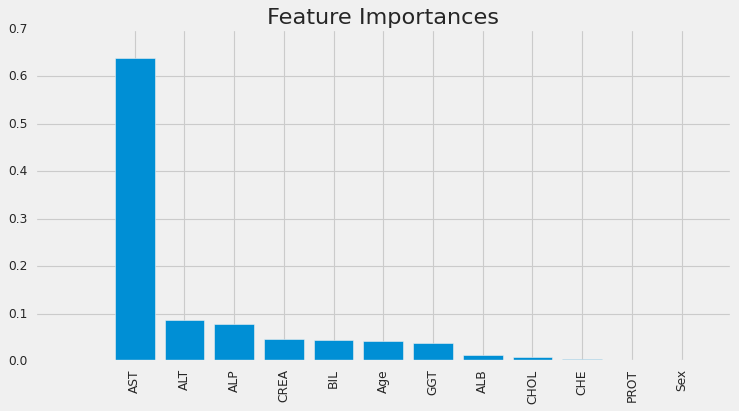

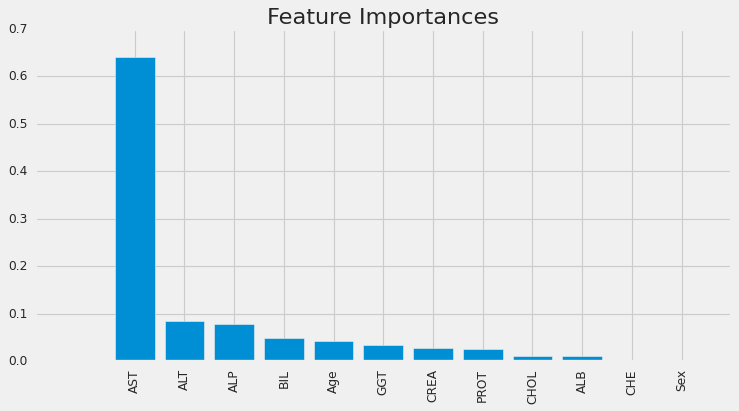

In [158]:
# fit the model
gb_model.fit(X_train, y_train)

# get feature importances
importances = gb_model.feature_importances_

# get feature names
feature_names = X.columns

# sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# plot feature importances
plt.figure(figsize=(10,5))
plt.title("Feature Importances")
plt.bar(range(len(indices)), importances[indices])
plt.xticks(range(len(indices)), feature_names[indices], rotation='vertical')
plt.show()

# fit the model
gb_model.fit(X_train, y_train)

# get feature importances
importances = gb_model.feature_importances_

# get feature names
feature_names = X.columns

# sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# plot feature importances
plt.figure(figsize=(10,5))
plt.title("Feature Importances")
plt.bar(range(len(indices)), importances[indices])
plt.xticks(range(len(indices)), feature_names[indices], rotation='vertical')
plt.show()